# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
# Necessary Libraries 
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Convert raw data into pandas dataframe
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,Not Verified | Booked a flight return flight ...
1,✅ Trip Verified | I tried to check in on line...
2,✅ Trip Verified | A catalogue of failures. We...
3,✅ Trip Verified | \r\nOur flight out to Dubro...
4,Not Verified | If I could give a minus rating...


In [4]:
# Convert dataset into csv
data.to_csv("BA_reviews.csv")

 The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Read the dataset
data = pd.read_csv("BA_reviews.csv")
data.head()

,Unnamed: 0,reviews
0,0,Not Verified | Booked a flight return flight ...
1,1,✅ Trip Verified | I tried to check in on line...
2,2,✅ Trip Verified | A catalogue of failures. We...
3,3,✅ Trip Verified | \r\nOur flight out to Dubro...
4,4,Not Verified | If I could give a minus rating...


In [6]:
# Check shape of dataframe
data.shape

(1000, 2)

In [7]:
# Check information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# Drop Unnecessary Column
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [9]:
# Check the first review
data['reviews'].loc[0]

'Not Verified |  Booked a flight return flight between London and Munich for 3/11 to 3/17 in December. The return flight was cancelled and re-booked from 3/17 to 3/12. British Airways only notified me of the first change, but not the second. Getting the flight reinstated took multiple phone calls on both occasions. Each time needing to find a helpful representative. British Airway employees told me that even though they cancelled my flight they did not have to refund the ticket. They tried to charge an $800 change fee. Through repeatedly calling back, British Airways reinstated my 3/17 flight on 2/20 and then again on 3/6. To make sure it did not get changed again, i checked the status of my ticket daily from 3/12 to 3/15. It was intact those days. On 3/16 when it was time to check-in for the flight, it was gone. At the airport the staff at the British Airways check-in counter are not BA employees, so cannot help resolve problems. There are no BA representative at the Munich Airport. T

In [10]:
# Split the trip verified string
data.reviews = data.reviews.str.split('|', expand=True)[1]

In [11]:
data

,reviews
0,Booked a flight return flight between London...
1,I tried to check in on line and was informed...
2,A catalogue of failures. We flew from Belfas...
3,\r\nOur flight out to Dubrovnik was at the p...
4,"If I could give a minus rating, I would. Sup..."
...,...
995,Dubai to London Heathrow. Lovely flight and ...
996,London Heathrow to Singapore on 28 May 2018....
997,"Paris to Newark, flight cancelled. This expe..."
998,I flew BA from Heraklion to Gatwick. I bough...


In [12]:
# Function to clean text
def clean(text):
    # Remove all special characters & numbers except alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

data['clean_reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,clean_reviews
0,Booked a flight return flight between London...,Booked a flight return flight between London ...
1,I tried to check in on line and was informed...,I tried to check in on line and was informed ...
2,A catalogue of failures. We flew from Belfas...,A catalogue of failures We flew from Belfast ...
3,\r\nOur flight out to Dubrovnik was at the p...,Our flight out to Dubrovnik was at the painfu...
4,"If I could give a minus rating, I would. Sup...",If I could give a minus rating I would Suppos...


In [13]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yashg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
# POS Tagger Dictionary
pos_dict = {'A':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    
    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

In [15]:
data['POS Tagged'] = data['clean_reviews'].apply(token_stop_pos)
data.head()

,reviews,clean_reviews,POS Tagged
0,Booked a flight return flight between London...,Booked a flight return flight between London ...,"[(Booked, v), (flight, n), (return, n), (fligh..."
1,I tried to check in on line and was informed...,I tried to check in on line and was informed ...,"[(tried, v), (check, v), (line, n), (informed,..."
2,A catalogue of failures. We flew from Belfas...,A catalogue of failures We flew from Belfast ...,"[(catalogue, n), (failures, n), (flew, v), (Be..."
3,\r\nOur flight out to Dubrovnik was at the p...,Our flight out to Dubrovnik was at the painfu...,"[(flight, n), (Dubrovnik, n), (painful, None),..."
4,"If I could give a minus rating, I would. Sup...",If I could give a minus rating I would Suppos...,"[(could, None), (give, v), (minus, n), (rating..."


In [16]:
# Obtaining the stem words – Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

In [17]:
data['lemma_rev'] = data['POS Tagged'].apply(lemmatize)
data.head()

,reviews,clean_reviews,POS Tagged,lemma_rev
0,Booked a flight return flight between London...,Booked a flight return flight between London ...,"[(Booked, v), (flight, n), (return, n), (fligh...",Booked flight return flight London Munich De...
1,I tried to check in on line and was informed...,I tried to check in on line and was informed ...,"[(tried, v), (check, v), (line, n), (informed,...",try check line inform possible give reason t...
2,A catalogue of failures. We flew from Belfas...,A catalogue of failures We flew from Belfast ...,"[(catalogue, n), (failures, n), (flew, v), (Be...",catalogue failure fly Belfast Heathrow week ...
3,\r\nOur flight out to Dubrovnik was at the p...,Our flight out to Dubrovnik was at the painfu...,"[(flight, n), (Dubrovnik, n), (painful, None),...",flight Dubrovnik painful time morning London...
4,"If I could give a minus rating, I would. Sup...",If I could give a minus rating I would Suppos...,"[(could, None), (give, v), (minus, n), (rating...",could give minus rating would Supposed LHR A...


In [18]:
data['lemma_rev'][0]

'  Booked flight return flight London Munich December return flight cancel book British Airways notify first change second Getting flight reinstate take multiple phone call occasion time need find helpful representative British Airway employee tell even though cancel flight refund ticket try charge change fee repeatedly call back British Airways reinstate flight make sure get change check status ticket daily intact day time check flight go airport staff British Airways check counter BA employee help resolve problem BA representative Munich Airport confirmation documentation British Airways value leave strand airport'

In [19]:
data['clean_reviews'][0]

' Booked a flight return flight between London and Munich for to in December The return flight was cancelled and re booked from to British Airways only notified me of the first change but not the second Getting the flight reinstated took multiple phone calls on both occasions Each time needing to find a helpful representative British Airway employees told me that even though they cancelled my flight they did not have to refund the ticket They tried to charge an change fee Through repeatedly calling back British Airways reinstated my flight on and then again on To make sure it did not get changed again i checked the status of my ticket daily from to It was intact those days On when it was time to check in for the flight it was gone At the airport the staff at the British Airways check in counter are not BA employees so cannot help resolve problems There are no BA representative at the Munich Airport The confirmation documentation from British Airways was of no value I was left stranded 

In [20]:
!pip install vaderSentiment

You should consider upgrading via the 'C:\Python3.9\python.exe -m pip install --upgrade pip' command.


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

In [22]:
# Function to calculate vader sentiment
def sentiment_scores(review):
    ss = Analyzer.polarity_scores(review)
    return ss['compound']

data['Sentiment'] = data['lemma_rev'].apply(sentiment_scores)

# Function to analyse the sentiment
def sentiment_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [23]:
data['Review'] = data['Sentiment'].apply(sentiment_analysis)
data.head(10)

,reviews,clean_reviews,POS Tagged,lemma_rev,Sentiment,Review
0,Booked a flight return flight between London...,Booked a flight return flight between London ...,"[(Booked, v), (flight, n), (return, n), (fligh...",Booked flight return flight London Munich De...,0.7717,Positive
1,I tried to check in on line and was informed...,I tried to check in on line and was informed ...,"[(tried, v), (check, v), (line, n), (informed,...",try check line inform possible give reason t...,-0.5423,Negative
2,A catalogue of failures. We flew from Belfas...,A catalogue of failures We flew from Belfast ...,"[(catalogue, n), (failures, n), (flew, v), (Be...",catalogue failure fly Belfast Heathrow week ...,-0.9022,Negative
3,\r\nOur flight out to Dubrovnik was at the p...,Our flight out to Dubrovnik was at the painfu...,"[(flight, n), (Dubrovnik, n), (painful, None),...",flight Dubrovnik painful time morning London...,0.9938,Positive
4,"If I could give a minus rating, I would. Sup...",If I could give a minus rating I would Suppos...,"[(could, None), (give, v), (minus, n), (rating...",could give minus rating would Supposed LHR A...,-0.3612,Negative
5,"Plane was over an hour late leaving, no probl...",Plane was over an hour late leaving no proble...,"[(Plane, n), (hour, n), (late, None), (leaving...",Plane hour late leaving problem happen arriv...,-0.2960,Negative
6,We were flying World Traveller Plus their Pr...,We were flying World Traveller Plus their Pre...,"[(flying, v), (World, n), (Traveller, n), (Plu...",fly World Traveller Plus Premium service Pre...,-0.9081,Negative
7,This was literally one of the worst experien...,This was literally one of the worst experienc...,"[(literally, r), (one, None), (worst, None), (...",literally one worst experience airport since...,-0.8555,Negative
8,The usual shambolic unfolding that BA has no...,The usual shambolic unfolding that BA has now...,"[(usual, None), (shambolic, n), (unfolding, v)...",usual shambolic unfold BA unfortunately come...,-0.4215,Negative
9,Lost my case and took 6 weeks to locate it a...,Lost my case and took weeks to locate it and ...,"[(Lost, v), (case, n), (took, v), (weeks, n), ...",Lost case take week locate still reply week ...,-0.3903,Negative


In [24]:
# Check value_count on Review column
review_count = data['Review'].value_counts()
review_count

Positive    528
Negative    363
Neutral     109
Name: Review, dtype: int64

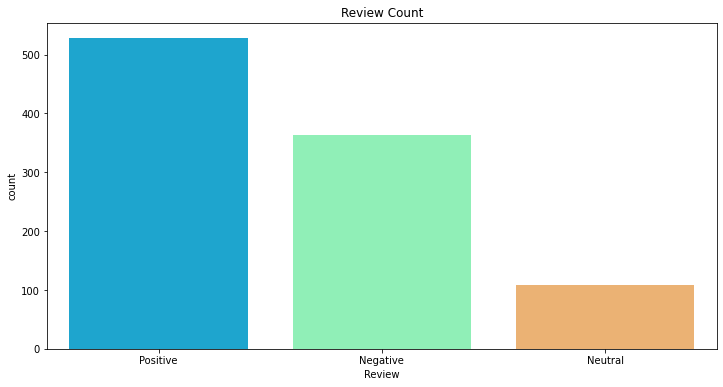

In [25]:
# Review Countplot
plt.figure(figsize=(12,6))
plt.title('Review Count');
sns.countplot(x=data['Review'], data=data, palette='rainbow');

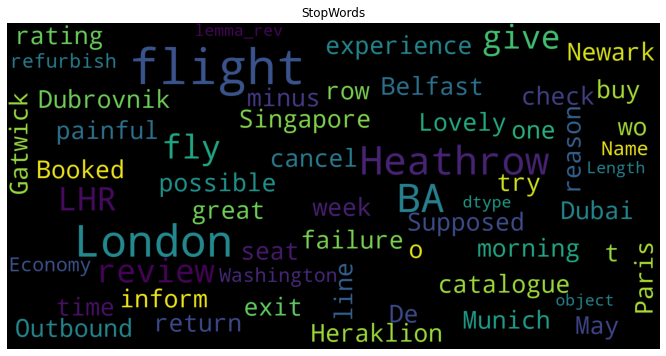

In [26]:
stopwords = set(STOPWORDS)

# Function to generate stopwords
def show_wordcloud(data):
    wordcloud = WordCloud(max_words=150,
                          background_color='black',
                          max_font_size=30,
                          stopwords=stopwords,
                          scale=4,
                          random_state=1)
    wordcloud = wordcloud.generate(str(data))
    
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.title('StopWords')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data.lemma_rev)